In [5]:
#!pip install customhys==1.1.6;
!pip install optproblems

In [6]:
from cProfile import label

from customhys import benchmark_func as bf
from customhys import metaheuristic as mh


import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import numpy as np
import pandas as pd

### Ackley 1 
####  Domain Limits::  −35 ≤ xi ≤ 35.
- (Continuous, Differentiable, Non-separable, Scalable, Multi- modal)
- The global minima is located at origin x∗ = (0,··· ,0),
f(x∗) = 0.

In [7]:
## Metaheuristics with Dimension 2

# Name: SwarmMetaheuristic

# Code:
import sys
from pathlib import Path

fun = bf.Ackley1(2)   
prob = fun.get_formatted_problem()

heur = [
    ('swarm_dynamic',
     {'factor': 0.7,
      'self_conf': 2.54,
      'swarm_conf': 2.56,
      'version': 'inertial',
      'distribution': 'uniform'},
     'greedy'),
    ('local_random_walk',
     {'probability': 0.75,
      'scale': 1.0,
      'distribution': 'uniform'},
     'greedy')
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))

# Short explanation and justification:
# The SwarmMetaheuristic combines the swarm_dynamic operator with the local_random_walk operator.
# Swarm_dynamic provides a global search capability, while local_random_walk offers local exploration.
# Together, they cover a diverse search landscape, increasing the probability of finding the optimal solution.


Search operators to employ:
swarm_dynamic(factor=0.7,self_conf=2.54,swarm_conf=2.56,version='inertial',distribution='uniform') with greedy
local_random_walk(probability=0.75,scale=1.0,distribution='uniform') with greedy
--------------------------------------------------
1
pop. radius: 1.229378469925293
x_best = [ 0.12590483 -1.24386036], f_best = 4.510532750914081
2
pop. radius: 1.2672055308201817
x_best = [ 0.12590483 -1.24386036], f_best = 4.510532750914081
3
pop. radius: 1.314568915703851
x_best = [ 0.12590483 -1.24386036], f_best = 4.510532750914081
4
pop. radius: 1.2966040576144768
x_best = [ 0.12590483 -1.24386036], f_best = 4.510532750914081
5
pop. radius: 1.337559653392494
x_best = [ 0.12590483 -1.24386036], f_best = 4.510532750914081
6
pop. radius: 1.34478596911712
x_best = [ 0.12590483 -1.24386036], f_best = 4.510532750914081
7
pop. radius: 1.3561107981446816
x_best = [ 0.12590483 -1.24386036], f_best = 4.510532750914081
8
pop. radius: 1.3634767838314947
x_best = [ 0.1259048

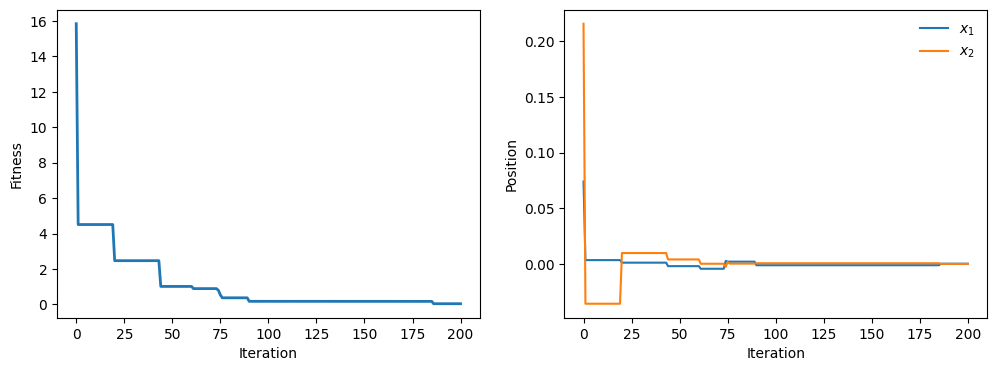

In [8]:
hist_values = met.historical

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(hist_values['fitness'], lw=2)
axs[0].set_xlabel('Iteration'), axs[0].set_ylabel('Fitness')

axs[1].plot(hist_values['position'])
axs[1].set_xlabel(r'Iteration'), axs[1].set_ylabel(r'Position')
axs[1].legend([f"$x_{ii+1}$" for ii in range(6)], frameon=False)

plt.show()

In [9]:
# Initialise the fitness register
fitness = []
# Run the metaheuristic with the same problem 30 times
for rep in range(30):
    met = mh.Metaheuristic(prob, heur, num_iterations=1000, num_agents=100)
    met.reset_historicals()
    met.verbose = False
    met.run()
    print('rep = {}, x_best = {}, f_best = {}'.format(rep+1, *met.get_solution()))
    
    fitness.append(met.historical['fitness'])

rep = 1, x_best = [-5.02595458e-12  6.14635629e-13], f_best = 5.012488202282839e-10
rep = 2, x_best = [-1.76871611e-12 -3.16540738e-12], f_best = 3.58959084678645e-10
rep = 3, x_best = [ 3.62116086e-13 -2.13523168e-12], f_best = 2.1439561237457383e-10
rep = 4, x_best = [-1.49508523e-12 -2.11375474e-12], f_best = 2.5630342292970454e-10
rep = 5, x_best = [2.66479654e-12 5.33332801e-12], f_best = 5.902087707454484e-10
rep = 6, x_best = [ 1.05346258e-12 -7.45466427e-12], f_best = 7.453060391071631e-10
rep = 7, x_best = [-2.05819603e-12 -3.71226827e-14], f_best = 2.0378365661599673e-10
rep = 8, x_best = [-9.02944650e-13 -3.04192123e-12], f_best = 3.141238380521827e-10
rep = 9, x_best = [ 6.17101916e-12 -8.98618159e-12], f_best = 1.0791509907903674e-09
rep = 10, x_best = [-1.40455910e-12 -6.99561589e-13], f_best = 1.553353001781943e-10
rep = 11, x_best = [1.45554793e-12 3.41796949e-13], f_best = 1.4800960457250767e-10
rep = 12, x_best = [-6.45962798e-13 -1.24036211e-12], f_best = 1.384421466

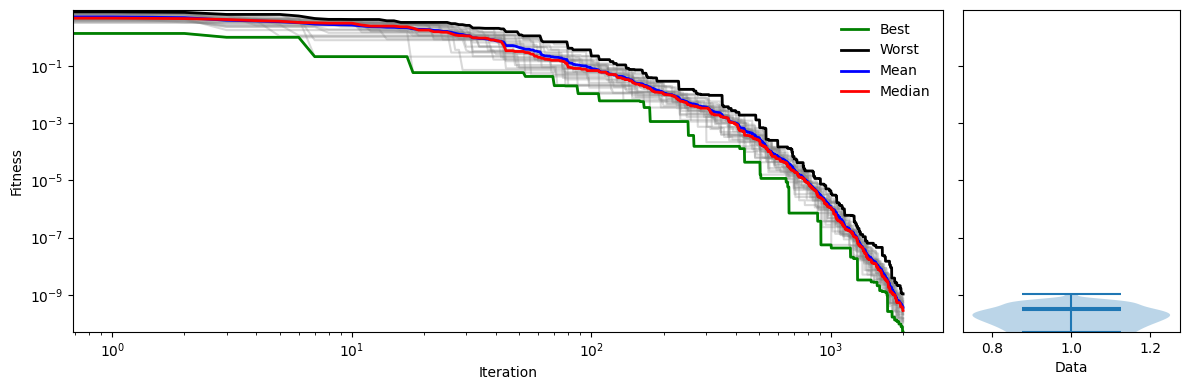

In [12]:
fitness_array = np.array(fitness).T
final_fitness = np.array([x[-1] for x in fitness_array.T])
best_fitness = np.min(fitness_array)
initial_fitness = max([x[0] for x in fitness_array])

# Now plot the fitness values
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey='row', gridspec_kw={'width_ratios': [0.8, 0.2]})
axs[0].plot(fitness_array, 'grey', alpha=0.3)

axs[0].plot(np.min(fitness_array, axis=1), 'g', lw=2, label='Best')
axs[0].plot(np.max(fitness_array, axis=1), 'k', lw=2, label='Worst')
axs[0].plot(np.mean(fitness_array, axis=1), 'b', lw=2, label='Mean')
axs[0].plot(np.median(fitness_array, axis=1), 'r', lw=2, label='Median')

axs[0].set_ylabel(r'Fitness')
axs[0].set_xlabel(r'Iteration')
axs[0].set_ylim([best_fitness, initial_fitness])

# Violin plot
axs[1].violinplot(final_fitness, showmeans=True, showmedians=True)
axs[1].set_xlabel(r'Data')

axs[0].legend(frameon=False)

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].set_xscale('log')
plt.tight_layout()
plt.show()

In [14]:
## Metaheuristics with Dimension 2

# Name: SwarmMetaheuristic
# Code:
import sys
from pathlib import Path
 

fun = bf.Ackley1(2)   
prob = fun.get_formatted_problem()

heur = [
    (  # Search operator 1
        'swarm_dynamic',
        {
            'factor': 0.7,
            'self_conf': 2.54,
            'swarm_conf': 2.56,
            'version': 'inertial',
            'distribution': 'gaussian'
        },
        'greedy'
    ),
    (
        'local_random_walk',
        {
            'probability': 0.75,
            'scale': 1.0,
            'distribution': 'uniform'
        },
        'all'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))

# Short explanation and justification:
# This metaheuristic combines the swarm optimization of the "swarm_dynamic" operator with the local search capabilities of the "local_random_walk" operator.
# The swarm optimization helps explore the solution space, while the local search ensures that promising solutions are further explored.
# The combination of these operators is expected to result in a balanced exploration and exploitation strategy, leading to a good balance between finding promising solutions and avoiding local optima.


Search operators to employ:
swarm_dynamic(factor=0.7,self_conf=2.54,swarm_conf=2.56,version='inertial',distribution='gaussian') with greedy
local_random_walk(probability=0.75,scale=1.0,distribution='uniform') with all
--------------------------------------------------
1
pop. radius: 1.4740051157702663
x_best = [-5.11581467 -5.9436459 ], f_best = 13.798977349381044
2
pop. radius: 1.595263715039535
x_best = [-5.11581467 -5.9436459 ], f_best = 13.798977349381044
3
pop. radius: 1.7067370424872275
x_best = [-5.11581467 -5.9436459 ], f_best = 13.798977349381044
4
pop. radius: 1.7391136208088491
x_best = [-1.06895575  6.03484491], f_best = 11.747140806497557
5
pop. radius: 1.6103716721280816
x_best = [-1.06895575  6.03484491], f_best = 11.747140806497557
6
pop. radius: 1.4708382281861947
x_best = [-1.06895575  6.03484491], f_best = 11.747140806497557
7
pop. radius: 1.6026188950477194
x_best = [-1.06895575  6.03484491], f_best = 11.747140806497557
8
pop. radius: 1.6706370169280031
x_best = [-

In [15]:
## Metaheuristics with Dimension 2

## Name: SwarmMetaheuristic

import sys

fun = bf.Ackley1(2)
prob = fun.get_formatted_problem()

heur = [
    ('swarm_dynamic', {'factor': 0.7, 'self_conf': 2.54, 'swarm_conf': 2.56, 'version': 'inertial', 'distribution': 'uniform'}, 'greedy'),
    ('local_random_walk', {'probability': 0.75, 'scale': 0.5, 'distribution': 'gaussian'}, 'metropolis')
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))



Search operators to employ:
swarm_dynamic(factor=0.7,self_conf=2.54,swarm_conf=2.56,version='inertial',distribution='uniform') with greedy
local_random_walk(probability=0.75,scale=0.5,distribution='gaussian') with metropolis
--------------------------------------------------
1
pop. radius: 1.058274327829902
x_best = [-0.34977881  1.21387507], f_best = 5.155761903050827
2
pop. radius: 1.0944608425428495
x_best = [0.94238836 0.35724719], f_best = 4.206673258708431
3
pop. radius: 1.1555395283816154
x_best = [0.94238836 0.35724719], f_best = 4.206673258708431
4
pop. radius: 1.0888425873960668
x_best = [0.94238836 0.35724719], f_best = 4.206673258708431
5
pop. radius: 1.0385177443361524
x_best = [0.94238836 0.35724719], f_best = 4.206673258708431
6
pop. radius: 1.0693257065302835
x_best = [0.94238836 0.35724719], f_best = 4.206673258708431
7
pop. radius: 1.0032658916276034
x_best = [0.94238836 0.35724719], f_best = 4.206673258708431
8
pop. radius: 1.036292903506619
x_best = [0.949181  0.88